# Análise Sobre a Diferença de Gênero na UFRN

Disciplina: Probabilidade

Projeto I - Segunda Unidade

Alunos:
- Noé Fernandes Carvalho Pessoa
- Giovanne da Silva Santos
- Kevin Wallacy de Souza Maciel

Nesse estudo, temos a missão de realizar uma análise sobre a diferença de gênero entre servidores, alunos e professores da
UFRN.
Por primeiro, analisaremos a diferença de gênero entre os servidores.

Antes de tudo, adicionamos as bibliotecas necessárias para a manipulação dos dados.

In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Logo depois, atribuimos os links dos arquivos às variáveis servidores_url e discentes que serão posteriormente usadas.
Atribuimos o arquivo lido e as colunas úteis a variável servidores. Também é interessante usar a função dropna para retirar
as linhas com dados faltantes.

In [20]:
servidores_url = 'http://bit.do/servidores_ufrn'
servidores = pd.read_csv(servidores_url, sep=';', usecols = ['nome', 'categoria', 'situacao_servidor', 'unidade', 'admissao'])

Nossa intenção agora é descobrir o número de admissões anuais da UFRN por gênero desde os primeiros registros até o ano
de 2018. Contudo, é possível perceber que a coluna admissao está em formato de string. Portanto, utilizamos a função 
str.split para retornar ao dataframe servidores a primeira posição da lista de strings gerada, que será o ano. Logo 
depois usamos a função astype para converter o valor do ano para inteiro.

In [21]:
servidores.loc[0:2]

,nome,categoria,situacao_servidor,unidade,admissao
0,ABIATA MARTINS,Técnico Administrativo,Aposentado,DEPARTAMENTO DE PESSOAL PENSIONISTA CIVIS,1981-10-06 00:00:00
1,ABIGAIL CALDAS BATISTA GONDIM,Técnico Administrativo,Aposentado,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,1979-04-01 00:00:00
2,ABIGAIL DE ANDRADE SOUZA,Docente \n,Aposentado,DAP/PROGESP - DIRETORIA DE ADMINISTRACAO DE PE...,1969-10-21 00:00:00


In [22]:
servidores['admissao'] = servidores.admissao.str.split('-').str[0]
servidores['admissao'] = servidores['admissao'].astype(int)

Para uma visualização inicial, criamos o histograma que expressa o total de admissões da UFRN em cada um dos anos.
Para gerar o gráfico, inserimos como parâmetro a coluna admissao do dataframe. Além disso, o parâmetro bins é definido
como 75 com a intenção de que as "caixinhas" recebam as admissões anuais. Já a função range atribui ao gráfico o intervalo
considerado a construção do gráfico.

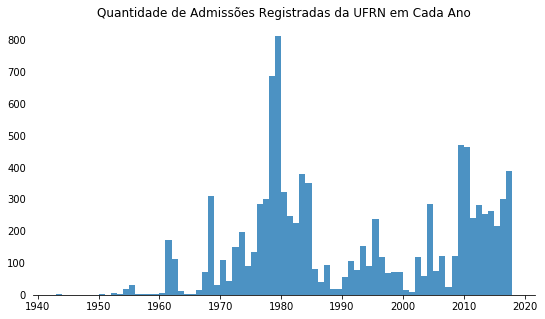

In [37]:
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(servidores.admissao, bins=75, range=(1943,2018), alpha=0.8)
plt.title("Quantidade de Admissões Registradas da UFRN em Cada Ano")
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left=False)
plt.show()

Antes de começarmos a análise de gênero precisamos identificar se o servidor é do sexo masculino e feminino. Para isso,
precisamos por meio de um código criar uma nova coluna no dataframe que expresse o sexo do indivíduo. Para resolver esse
problema temos a biblioteca genderBR, mas para usá-la é necessário instalar o Rstudio e carregá-lo no Jupyter. Logo, após
percorremos a coluna nome do dataframe, identificamos o gênero por meio do do R e retornamos os nomes que foram
identificados para a lista generos, que por sua vez é adicionada a uma nova coluna criada também nomeada generos (os nomes não indentificados foram retornados a lista, e consequentemente a coluna, como None).

In [ ]:
!conda install -c r rpy2 --y

In [2]:
import rpy2.robjects as robjects
%load_ext rpy2.ipython

In [3]:
%%R 
suppressMessages(library(genderBR))

In [85]:
generos = []
for i in servidores.nome:
    primeiro_nome = i.split()[0]
    genero = robjects.r.get_gender(primeiro_nome)
    genero = genero.r_repr()
    genero = genero.strip('\"')
    if genero.startswith('NA'):
        genero = None
    generos.append(genero)
    
servidores["generos"] = generos

In [2]:
#Se já tiver o arquivo salvo
servidores = pd.read_csv('generos.csv')

In [40]:
servidores.head()

,Unnamed: 0,nome,categoria,situacao_servidor,unidade,admissao,generos
0,0,ABIATA MARTINS,Técnico Administrativo,Aposentado,DEPARTAMENTO DE PESSOAL PENSIONISTA CIVIS,1981,Male
1,1,ABIGAIL CALDAS BATISTA GONDIM,Técnico Administrativo,Aposentado,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,1979,Female
2,2,ABIGAIL DE ANDRADE SOUZA,Docente \n,Aposentado,DAP/PROGESP - DIRETORIA DE ADMINISTRACAO DE PE...,1969,Female
3,3,ABIGAIL MOURA,Docente \n,Aposentado,DEPARTAMENTO DE PESSOAL PENSIONISTA CIVIS,1976,Female
4,4,ABILIO FONSECA DE SOUSA,Técnico Administrativo,Aposentado,REITORIA,1960,Male


Filtramos, então, o dataframe considerando o gênero do servidor. Retornamos, assim, à mulheres_info e homens_info
aquelas linhas nas quais os indivíduos foram indentificados como mulher e homem, respectivamente. Portanto, finalmente
podemos criar os histogramas que representarão a quantidade de admissões anuais de ambos os sexos. Então, criamos uma
figura de tamanho (12,10) e adicionamos dois outro espaços na figura nos quais serão contruídos os gráficos, atribuindo-os
as variáveis ax1 e ax2. Utilizando, praticamente os mesmos parâmetros do último gráfico, nós podemos gerar os novos dois
gráficos.

In [6]:
mulheres_info = servidores[servidores.generos == 'Female']
homens_info = servidores[servidores.generos == 'Male']

Número de Servidores Admitidos pela UFRN por Gênero ao Longo dos Anos  

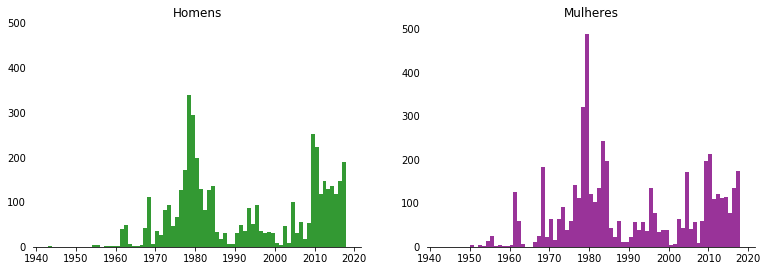

In [73]:
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax1.hist(homens_info.admissao, bins=75, range=(1943,2018), color='green', alpha=0.8)
ax2.hist(mulheres_info.admissao, bins=75, range=(1943,2018), color='purple', alpha=0.8)
ax1.set_ylim(0,500)
ax1.set_title("Homens")
ax2.set_title("Mulheres")
ax1.tick_params(left=False)
ax2.tick_params(left=False)
ax3.tick_params(left=False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.show()

Agora, teremos como objetivo criar um gráfico de linha que expresse o quanto a percentagem de admissões de mulheres 
e homens variou ao longo dos anos, e também procurar saber se a há grande disparidade de valores.
Uma possível solução é criar tabelas por meio da função pivot_table, utilizando como índice a coluna admissao, e retornar
o valor total de pessoas admitidas, o número de homens admitidos e o número de mulheres admitidas em cada ano.
Retornamos as tabelas a total_admissoes, admissoes_mulheres e admissoes_homens, respectivamente.

In [7]:
total_admissoes = servidores.pivot_table(index='admissao', values='generos', aggfunc='count')
total_admissoes.head()

,generos
admissao,
1943,1
1950,4
1952,5
1953,1
1954,18


In [8]:
admissoes_mulheres = mulheres_info.pivot_table(index='admissao', values='generos', aggfunc='count') 
admissoes_mulheres.head()

,generos
admissao,
1950,4
1952,5
1953,1
1954,13
1955,25


Para obter uma nova tabela com a porcentagem de mulheres admitidas por ano, dividimos a tabela com o número de mulheres
pela tabela com o valor total de admissões, multiplicando por 100 para facilitar a visualização. É importante também
apagar os dados nulos que se formam pela divisão por zero e também utilizar a função reset_index para transformar o
índice admissao em coluna, para assim possibilitar a geração do gráfico.

In [14]:
porcentagem_mulheres = (admissoes_mulheres/total_admissoes)*100
porcentagem_mulheres = porcentagem_mulheres.fillna(0)
porcentagem_mulheres.reset_index(inplace=True)
porcentagem_mulheres.head()

,admissao,generos
0,1943,0.000000
1,1950,100.000000
2,1952,100.000000
3,1953,100.000000
4,1954,72.222222


Esse novo gráfico usará tabela porcentagem_mulheres como referência. Para a primeira linha do gráfico, que representa a 
porcetagem de mulheres, teremos como parâmetro a coluna admissao para o eixo x e a coluna generos para o eixo y. Já para 
a segunda, que representa a porcentagem de homens, o eixo x será considerado como o complemento da porcentagem de
mulheres. Por esse motivo, subtrai-se a porcentagem de mulheres do 100.

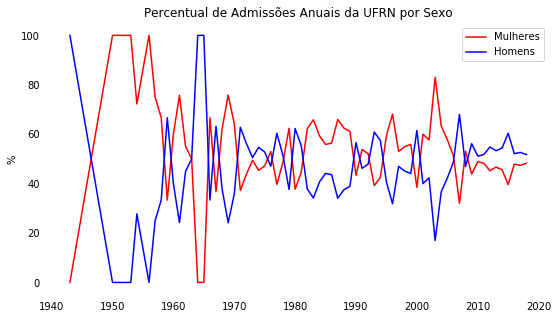

In [15]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(porcentagem_mulheres.admissao,porcentagem_mulheres.generos, c='red', label='Mulheres')
ax.plot(porcentagem_mulheres.admissao,100 - porcentagem_mulheres.generos, c = 'blue', label='Homens')
ax.legend(loc='best')
ax.set_ylabel("%")
plt.title("Percentual de Admissões Anuais da UFRN por Sexo")
ax.tick_params(bottom=False,top=False,left=False,right=False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Desta vez, temos o objetivo de criar gráficos de barra que representem o número de homens e mulheres que pertencem as três
maiores unidades da UFRN em número de servidores. Para isso, primeiramente, devemos filtrar o dataframe e considerar 
apenas as linhas cujo servidor é registrado como "Ativo permanente". Para encontrar essas três maiores unidades usaremos
um dicionário que receberá os valores da coluna unidades e guardará o número de vezes que eles se repetem. Tendo esses
valores, ordenamo-os em ordem descrescente.

In [47]:
servidores_ativos = servidores[servidores['situacao_servidor'] == 'Ativo Permanente']

In [48]:
servidores_ativos.head()

,Unnamed: 0,nome,categoria,situacao_servidor,unidade,admissao,generos
4738,4738,ABDO FARRET NETO,Docente \n,Ativo Permanente,DEPARTAMENTO DE MEDICINA INTEGRADA,2009,Male
4739,4739,ABMAEL BEZERRA DE OLIVEIRA,Docente \n,Ativo Permanente,DEPARTAMENTO DE ENGENHARIA ELÉTRICA,1973,Male
4740,4740,ABNER CARLOS COSTA DE MELO,Técnico Administrativo,Ativo Permanente,DEPARTAMENTO DE FÍSICA TEÓRICA E EXPERIMENTAL,2014,Male
4741,4741,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,Docente \n,Ativo Permanente,CERES - DEPARTAMENTO DE HISTÓRIA,2016,Male
4742,4742,ACACIA JESSICA MAIA DE MOURA,Técnico Administrativo,Ativo Permanente,ESCOLA AGRÍCOLA DE JUNDIAÍ,2013,Female


In [49]:
#Difença em quantidade no numero total de servidores ***ativos*** da UFRN de ambos os sexos
servidores_ativos.generos.value_counts()

Male      2735
Female    2393
Name: generos, dtype: int64

In [50]:
conj_unidades = {}
lista_unidades = []
for i in servidores_ativos.unidade:
    lista_unidades.append(i)
for i in lista_unidades:
    if i in conj_unidades:
        conj_unidades[i] += 1
    else:
        conj_unidades[i] = 1

In [51]:
sorted(conj_unidades.items(), key=lambda x: x[1],reverse=True)[:3]

[('EBSERH - DIVISÃO DE GESTÃO DE CUIDADO', 230),
 ('EBSERH - DIVISÃO DE APOIO DIAGNOSTICO E TERAPEUTICO', 199),
 ('ESCOLA AGRÍCOLA DE JUNDIAÍ', 184)]

Atribuimos, então, atráves das funções value_counts e values, as listas com o numero de homens e mulheres de cada umas 
das três unidades. Para efeito de organização trocamos a posição dos valores da lista EBSERH1 e EBSERH2 já que a função 
values organiza a lista do maior valor para o menor e isso não é interessante no nosso contexto.

In [52]:
EBSERH1 = servidores_ativos[(servidores_ativos.unidade == 'EBSERH - DIVISÃO DE GESTÃO DE CUIDADO')].generos.value_counts().values
EBSERH2 = servidores_ativos[(servidores_ativos.unidade == 'EBSERH - DIVISÃO DE APOIO DIAGNOSTICO E TERAPEUTICO')].generos.value_counts().values
EAJ = servidores_ativos[(servidores_ativos.unidade == 'ESCOLA AGRÍCOLA DE JUNDIAÍ')].generos.value_counts().values
EBSERH1 = [EBSERH1[1],EBSERH1[0]]
EBSERH2 = [EBSERH2[1],EBSERH2[0]]

Agora, geramos uma figura de tamanho (14,10) e adicionamos trẽs espaços nela aonde serão alocados os gráficos atráves da
função add_subplot. Como para gerar os três gráficos de barras precisaremos da posição dos índices no eixo x, aonde as barras serão colocadas, importamos a função arange do numpy para gerar e indicar essa posição. Adicionamos ainda como
parâmetro as listas com os valores gerados anteriormente, a largura das barras e suas cores. Também limitamos o eixo y a um
interval de 0 a 200 e, através da função range, organizamos os índices e fornecemos legendas que referenciam associam as
barras aos gêneros que elas representam.

Número de Homens e Mulheres nas Três Unidades com Mais Servidores da UFRN

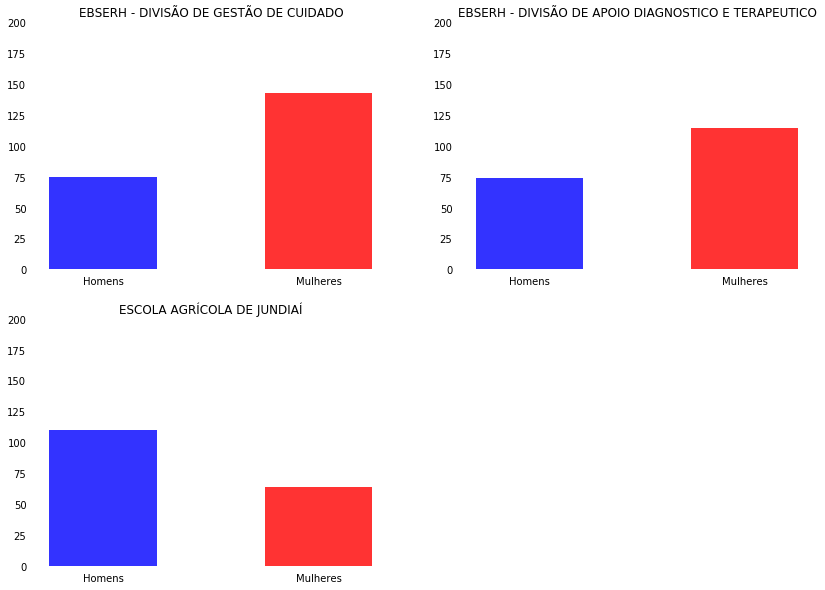

In [75]:
from numpy import arange
fig = plt.figure(figsize=(14,10)) 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
posicao = arange(2) + 1
coluna = ['Homens', 'Mulheres']
ax1.bar(posicao,EBSERH1,0.5,color=['blue','red'], alpha=0.8)
ax2.bar(posicao,EBSERH2,0.5, color=['blue','red'], alpha=0.8)
ax3.bar(posicao,EAJ,0.5,color=['blue','red'], alpha=0.8)
ax1.set_ylim(0,200)
ax2.set_ylim(0,200)
ax3.set_ylim(0,200)
indices = range(1,3)
ax1.set_xticks(indices)
ax2.set_xticks(indices)
ax3.set_xticks(indices)
ax1.set_xticklabels(coluna)
ax2.set_xticklabels(coluna)
ax3.set_xticklabels(coluna)
ax1.tick_params(left=False,bottom=False)
ax2.tick_params(left=False,bottom=False)
ax3.tick_params(left=False,bottom=False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax1.set_title("EBSERH - DIVISÃO DE GESTÃO DE CUIDADO")
ax2.set_title("EBSERH - DIVISÃO DE APOIO DIAGNOSTICO E TERAPEUTICO")
ax3.set_title("ESCOLA AGRÍCOLA DE JUNDIAÍ")
plt.show()
# Gráfico que representa o numero de homens e mulheres nas 3 unidades com mais servidoress 

Agora partiremos para a análise da diferença de gênero entre os alunos. Para tal primeiramente, lemos o arquivo dos 
discentes ingressantes do ano de 2018 e geramos novamente uma coluna que identifica o gênero do aluno.

In [ ]:
ingressantes = pd.read_csv(ingressantes2018, sep=';') 

In [11]:
genero_ingressante = []
for i in ingressantes.nome_discente:
    primeiro_nome = i.split()[0]
    genero = robjects.r.get_gender(primeiro_nome)
    genero = genero.r_repr()
    genero = genero.strip('\"')
    if genero.startswith('NA'):
        genero = None
    genero_ingressante.append(genero)
    
ingressantes["generos"] = genero_ingressante

In [57]:
ingressantes = pd.read_csv("ingressantes2018.csv")

In [58]:
ingressantes.loc[0:2]

,Unnamed: 0,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora,generos
0,0,20180057132,AADRIAN ANDREW COSTA BORGES,2018,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000034.0,ESTATÍSTICA,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,NaN
1,1,20183023601,ABDA ROCHA PINHEIRO,2018,1.0,PROCESSO SELETIVO,REGULAR,ATIVO,T,TÉCNICO,5401.0,TÉCNICO DE MÚSICA (REGÊNCIA),PRESENCIAL,284.0,ESCOLA DE MÚSICA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,Female
2,2,20180107403,ABDON FRANCISCO SANTANA NETO,2018,2.0,SiSU,REGULAR,CADASTRADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,Male


Teremos agora o objetivo de representar graficamente a quantidade de alunos das áreas de exatas e humanas do campus
central da UFRN ingressantes em 2018. Para isso, precisamos filtrar o dataframe ingressantes para obter as linhas que satisfazem os requerimentos necessários para representar um aluno de exatas ou humanas. Atribuímos os resultados às variáveis de mesmo nome.

Total de Ingressantes por Gêneros

In [59]:
ingressantes.generos.value_counts()

Male      5333
Female    4066
Name: generos, dtype: int64

Total de Ingressantes em Exatas

In [60]:
exatas = ingressantes[((ingressantes.nome_unidade_gestora == 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA') | 
                       (ingressantes.nome_unidade_gestora == 'CENTRO DE TECNOLOGIA') | 
                       (ingressantes.nome_curso == 'TECNOLOGIA DA INFORMAÇÃO')) & 
                      (ingressantes.nivel_ensino == 'GRADUAÇÃO')]
exatas.generos.value_counts()

Male      1087
Female     415
Name: generos, dtype: int64

Total de Ingressantes em Humanas

In [61]:
humanas = ingressantes[((ingressantes.nome_unidade_gestora == 'CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES') | 
                       (ingressantes.nome_unidade_gestora == 'CENTRO DE CIÊNCIAS SOCIAIS APLICADAS') | 
                       (ingressantes.nome_curso == 'CENTRO DE EDUCAÇÃO')) & 
                      (ingressantes.nivel_ensino == 'GRADUAÇÃO')]
humanas.generos.value_counts()

Male      911
Female    905
Name: generos, dtype: int64

Logo baixo, criamos uma figura de tamanho (15,12) na qual inserimos dois espaços que representaram a área de
exatas e humanas. Usamos as funções value_counts e values para retornar às variáveis valor1 e valor2 as listas com o 
número de homens e mulheres que pertencem as áreas de conhecimento. Então posicionamos as barras nos gráficos a partir da
função arange e os índices apartir da função range. Já como parâmetro para os dois gráficos, além da posição, fornecemos
as listas valor1 e valor2, a largura das barras e a cor que representa cada gênero. Para efeito de organização, definimos
o eixo y no intervalo entre 0 e 1500.

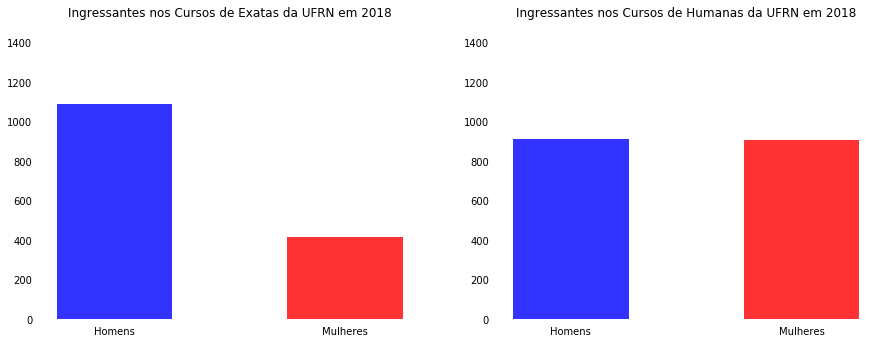

In [76]:
from numpy import arange
valor1 = exatas.generos.value_counts().values
valor2 = humanas.generos.value_counts().values
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
posicao = arange(2) + 1
indice = range(1,3)
ax1.set_xticks(indice)
ax1.set_xticklabels(["Homens","Mulheres"])
ax1.bar(posicao,valor1, 0.5, color = ['blue','red'], alpha=0.8)
ax1.set_ylim(0,1500)
ax1.set_title("Ingressantes nos Cursos de Exatas da UFRN em 2018")
ax2.set_xticks(indice)
ax2.set_xticklabels(["Homens","Mulheres"])
ax2.set_ylim(0,1500)
ax2.bar(posicao,valor2, 0.5, color = ['blue','red'], alpha=0.8)
ax2.set_title("Ingressantes nos Cursos de Humanas da UFRN em 2018")
ax1.tick_params(left=False,bottom=False)
ax2.tick_params(left=False,bottom=False)
ax3.tick_params(left=False,bottom=False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.show()

Tentaremos agora concluir a quantidade de mestrandos e doutorandos, independentemente da área de conhecimento a qual
pertence. Diante disso, novamente filtramos aqueles discentes que pertencem a cada um desses níveis de ensino e atribuimos
os resultados a variável mestrado e doutorado. Portanto, utilizando o mesmo padrão da figura anterior podemos construir
os dois gráficos com facilidade.

Número Total de Ingressantes em Mestrado

In [65]:
mestrado = ingressantes[ingressantes.nivel_ensino == 'MESTRADO']
mestrado.generos.value_counts()

Male      419
Female    391
Name: generos, dtype: int64

Número Total de Ingressantes em Doutorado

In [66]:
doutorado = ingressantes[ingressantes.nivel_ensino == 'DOUTORADO']
doutorado.generos.value_counts()

Female    146
Male      115
Name: generos, dtype: int64

A próxima figura, construída nos mesmo moldes das anteriores, representa a diferença por gênero no múmero de ingressantes
em cursos de mestrado e doutorado  na UFRN.

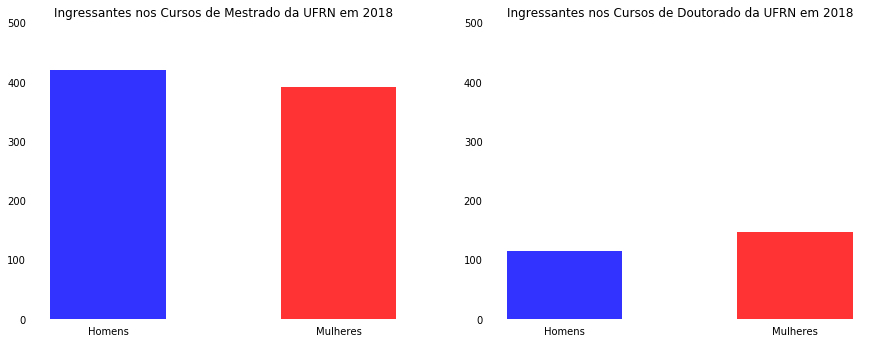

In [77]:
fig = plt.figure(figsize=(15,12))
valor1 = mestrado.generos.value_counts().values
valor2 = doutorado.generos.value_counts().values
valor2 = [valor2[1],valor2[0]]
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
posicao = arange(2) + 1
indice = range(1,3)
ax1.set_xticks(indice)
ax1.set_xticklabels(["Homens","Mulheres"])
ax1.bar(posicao,valor1, 0.5, color = ['blue','red'],alpha=0.8)
ax1.set_ylim(0,500)
ax1.set_title("Ingressantes nos Cursos de Mestrado da UFRN em 2018")
ax2.set_xticks(indice)
ax2.set_xticklabels(["Homens","Mulheres"])
ax2.set_ylim(0,500)
ax2.bar(posicao,valor2, 0.5, color = ['blue','red'],alpha=0.8)
ax2.set_title("Ingressantes nos Cursos de Doutorado da UFRN em 2018")
ax1.tick_params(left=False,bottom=False)
ax2.tick_params(left=False,bottom=False)
ax3.tick_params(left=False,bottom=False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.show()

Partimos agora para uma análise rápida dos professores.

Fazemos a leitura do dataset que representa o universo dos professores ativos da UFRN, considerando as colunas úteis. Logo após, separamos a parte do ano na coluna admissao através da função split e convertemos para inteiro com a astype. Criamos a coluna gênero.

In [10]:
url_docentes = 'http://bit.do/docentes_ufrn'
docentes = pd.read_csv(url_docentes, sep=';', usecols=['nome','formacao','admissao','lotacao'])

In [11]:
docentes['admissao'] = docentes.admissao.str.split('-').str[0]
docentes['admissao'] = docentes['admissao'].astype(int)

In [12]:
generos = []
for i in docentes.nome:
    primeiro_nome = i.split()[0]
    genero = robjects.r.get_gender(primeiro_nome)
    genero = genero.r_repr()
    genero = genero.strip('\"')
    if genero.startswith('NA'):
        genero = None
    generos.append(genero)
    
docentes["generos"] = generos

In [13]:
docentes.to_csv("docentes.csv")

In [68]:
docentes = pd.read_csv("docentes.csv")

In [69]:
docentes.head()

,Unnamed: 0,nome,formacao,lotacao,admissao,generos
0,0,MARIA NUBIA PESSOA,ESPECIALIZAÇÃO,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2010,Female
1,1,RUTILENE SANTOS DE SOUSA,MESTRADO,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2009,Female
2,2,ADAUTO CHIAMENTI,DOUTORADO,ESCOLA AGRÍCOLA DE JUNDIAÍ,1988,Male
3,3,ADELE GUIMARAES UBARANA SANTOS,MESTRADO,NÚCLEO DE EDUCAÇÃO DA INFÂNCIA,2006,Female
4,4,AFRANIO CESAR DE ARAUJO,DOUTORADO,ESCOLA AGRÍCOLA DE JUNDIAÍ,2008,Male


Número Geral de Professores Ativos da UFRN 

In [70]:
docentes.generos.value_counts()

Male      1219
Female     970
Name: generos, dtype: int64

Número de Professores Ativos por Ano de Ingresso

In [71]:
professoras = docentes[docentes.generos == 'Female']
professores = docentes[docentes.generos == 'Male']

Nós atribuimos as variáveis professores e professoras todas as linhas que representam homens e mulheres, respectivamente. Daí criamos uma figura e adicionamos dois gráficos a ela, um com o número de professores ativos e o outro com o 
de professoras ativas. Como parâmetro para os dois gráficos fornecemos as variáveis que possuem os dados de cada sexo, 
professores e professoras, o número 64 que guardará o número de professores no intervalo de 1 ano, além do intervalo gerado de 1954 a 2018.

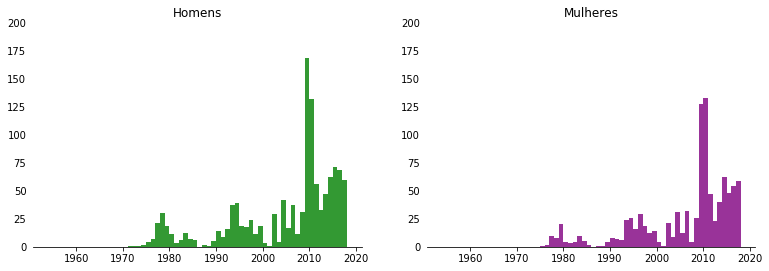

In [74]:
#Número de Professores ainda ativos por ano de ingresso
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax1.hist(professores.admissao, bins=64, range=(1954,2018), color='green', alpha=0.8)
ax1.set_title("Homens")
ax1.set_ylim(0,200)
ax2.set_ylim(0,200)
ax2.hist(professoras.admissao, bins=64, range=(1954,2018), color='purple', alpha=0.8)
ax2.set_title("Mulheres")
ax1.tick_params(left=False)
ax2.tick_params(left=False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.show()

Número de Professores com Mestrado e doutorado por Gênero 

Por primeiro, descobrimos o número de homens e mulheres com mestrado e doutorado. Guardamos isso numa lista e a usamos como parâmetro para criar um novo gráfico de barras. Pela discrepância numérica que há entre o número de professores em cada uma das formações precisamos ajustar os limites do eixo y a título de organização. 

Homens com Mestrado

In [142]:
mestrado_homens = docentes[(docentes.formacao == 'MESTRADO') & (docentes.generos == 'Male')]
len(mestrado_homens)

176

Mulheres com Mestrado

In [143]:

mestrado_mulheres = docentes[(docentes.formacao == 'MESTRADO') & (docentes.generos == 'Female')]
len(mestrado_mulheres)

134

Homens com Doutorado

In [144]:
doutorado_homens = docentes[(docentes.formacao == 'DOUTORADO') & (docentes.generos == 'Male')]
len(doutorado_homens)

979

Mulheres com Doutorado

In [145]:
doutorado_mulheres = docentes[(docentes.formacao == 'DOUTORADO') & (docentes.generos == 'Female')]
len(doutorado_mulheres)

772

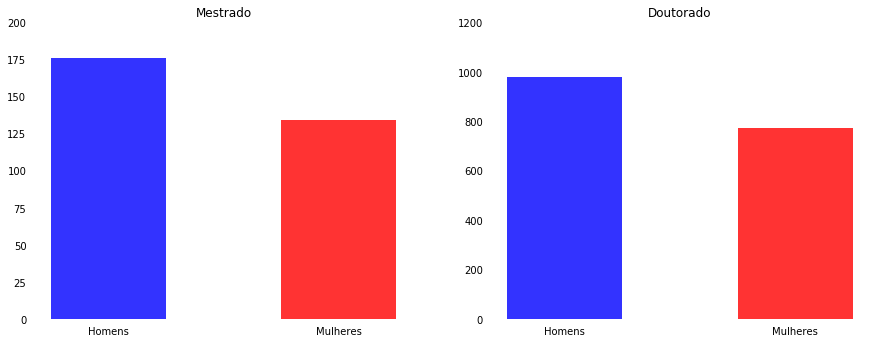

In [91]:
mestrado = [176,134]
doutorado = [979,772]

from numpy import arange
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
posicao = arange(2) + 1
ax1.bar(posicao, mestrado, 0.5, color=['blue','red'],alpha=0.8)
ax1.set_ylim(0,200)
ax2.set_ylim(0,1200)
indices = range(1,3)
coluna = ['Homens','Mulheres']
ax1.set_xticks(indices)
ax2.set_xticks(indices)
ax1.set_xticklabels(coluna)
ax2.set_xticklabels(coluna)
ax2.bar(posicao, doutorado, 0.5, color=['blue','red'],alpha=0.8)
ax1.tick_params(left=False,bottom=False)
ax2.tick_params(left=False,bottom=False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.set_title("Mestrado")
ax2.set_title("Doutorado")
plt.show()

Número de Professores Admitidos por Gênero ao Longo dos Anos

Nesse caso, há um problema na coluna categoria, pois existe um erro na palavra 'docente \n'. Contudo, a partir da função set é possível perceber que além de 'docente \n', só há mais uma outra categoria 'Técnico Administrativo'. Portanto, podemos atribuir às variáveis serv_professores e serv_professoras, além do gênero, todas as linhas que não tem 'Técnico 
Administrativo' na coluna categoria. O gráfico agora pode assim ser facilmente gerado. 

In [21]:
serv_professoras = servidores[(servidores.categoria != 'Técnico Administrativo') & (servidores.generos == 'Female')]
serv_professores = servidores[(servidores.categoria != 'Técnico Administrativo') & (servidores.generos == 'Male')]

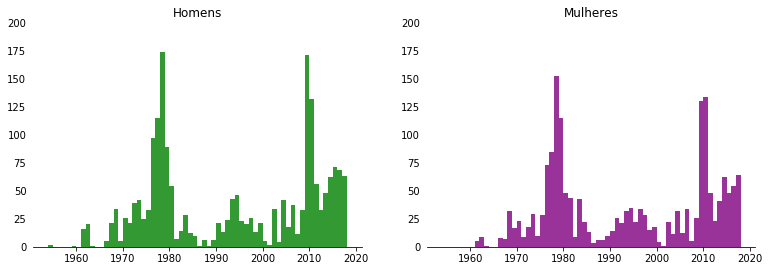

In [92]:
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax1.hist(serv_professores.admissao, bins=64, range=(1954,2018), color='green',alpha=0.8)
ax2.hist(serv_professoras.admissao, bins=64, range=(1954,2018), color='purple',alpha=0.8)
ax1.set_ylim(0,200)
ax2.set_ylim(0,200)
ax1.tick_params(left=False)
ax2.tick_params(left=False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_title("Homens")
ax2.set_title("Mulheres")
plt.show()

Temos agora o objetivo de criar um gráfico que represente a porcentagem de docentes homens e mulheres ingressantes na UFRN
ao longo dos anos. Para isso criamos tabelas a patir da função pivot_table, uma reprentando o número de mulheres admitidas
por ano e a outra o total de admitidos. Dividindo o numero de mulheres com o total, obtemos a tabela com a porcentagem.
Então no gráfico, fornecemos uma linha representando a porcentagem de mulheres e outra representado o valor complementar 
que representa os homens.

In [22]:
mulheres = serv_professoras.pivot_table(index='admissao', values='generos',aggfunc='count')
mulheres.head()

,generos
admissao,
1961,5
1962,9
1963,1
1966,8
1967,7


In [23]:
total = servidores[servidores.categoria != 'Técnico Administrativo']
total_prof = total.pivot_table(index='admissao', values='generos', aggfunc='count')
total_prof.head()

,generos
admissao,
1954,2
1959,1
1961,21
1962,29
1963,2


In [24]:
porcentagem_professoras = mulheres/total_prof*100
porcentagem_professoras = porcentagem_professoras.fillna(0)
porcentagem_professoras.reset_index(inplace=True)
porcentagem_professoras.head()

,admissao,generos
0,1954,0.000000
1,1959,0.000000
2,1961,23.809524
3,1962,31.034483
4,1963,50.000000


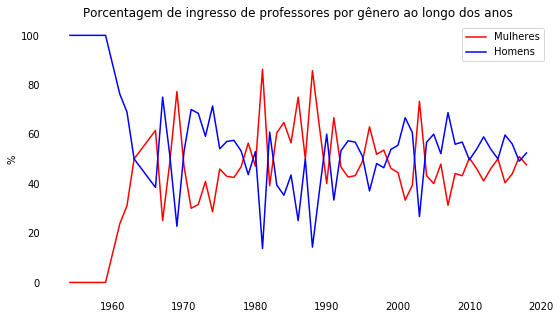

In [26]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(porcentagem_professoras.admissao,porcentagem_professoras.generos,c='red',label='Mulheres')
ax.plot(porcentagem_professoras.admissao,100 - porcentagem_professoras.generos,c='blue',label='Homens')
plt.legend(loc='best')
plt.title("Porcentagem de ingresso de professores por gênero ao longo dos anos")
plt.ylabel("%")
ax.tick_params(left=False,bottom=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()